<a href="https://colab.research.google.com/github/mkhi238/Pokemon_Classifier_Project/blob/main/ResNet_Completed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/gdrive
41101
2056


NameError: ignored

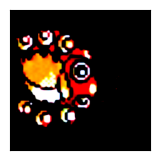

In [ ]:

import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler
from math import floor
import os
import torchvision.models
import time
from torchvision.models import resnet50, ResNet50_Weights
alexnet = torchvision.models.alexnet(pretrained=True)
vgg = torchvision.models.vgg19(pretrained = True)

densenet = torchvision.models.densenet121(pretrained = True)

torch.manual_seed(105)
#102 is main

from google.colab import drive
drive.mount('/content/gdrive')
train_path = "/content/gdrive/My Drive/APS360 Team Project/Gen2_NewAug/Training"
valid_path = "/content/gdrive/My Drive/APS360 Team Project/Gen2_NewAug/Validation"
test_path = "/content/gdrive/My Drive/APS360 Team Project/Gen2_NewAug/Test"


data_transforms = transforms.Compose([
                    transforms.Resize((224,224)),
                    transforms.ToTensor(),
                    transforms.Normalize(
                    mean=[0.485, 0.456, 0.406],
                    std=[0.229, 0.224, 0.225])
                    ])

train_datasets = torchvision.datasets.ImageFolder(root= train_path, transform = data_transforms) 

valid_datasets = torchvision.datasets.ImageFolder(root= valid_path, transform = data_transforms) 

print(len(train_datasets))


hyperparameters = [20,1]

train_loader = torch.utils.data.DataLoader(train_datasets, batch_size=hyperparameters[0], num_workers=hyperparameters[1], shuffle=True, collate_fn=None, pin_memory=False)
valid_loader = torch.utils.data.DataLoader(valid_datasets, batch_size=hyperparameters[0], num_workers=hyperparameters[1], shuffle=True, collate_fn=None, pin_memory=False)
print(len(train_loader))

dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.numpy()
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, int(20/2), idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx]))
    ax.set_title(pokemon_names[labels[idx]])

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, models, transforms
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
import os
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # device object

In [ ]:
model = models.resnet50(pretrained=True)   #load resnet18 model
num_features = model.fc.in_features     #extract fc layers features
model.fc = nn.Linear(num_features, 249) #(num_of_class == 2)
model = model.to(device) 


/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [ ]:
model = resnet50(weights=torchvision.models.ResNet50_Weights.DEFAULT)
for param in model.parameters():
    param.requires_grad = False   
    
model.fc = nn.Sequential(

               nn.Linear(2048, 1028),
               nn.Linear(1028, 512),
               nn.ReLU(inplace=True),
               nn.Linear(512, 249))

In [ ]:
model = torchvision.models.resnet50(pretrained=True)
model = torch.nn.DataParallel(model)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
model = torchvision.models.resnet50(pretrained=True)
for param in model.parameters():
    param.requires_grad = False   
model
res = model.resnet18(pretrained=True)
res = list(res.children())[:-2]
_res = nn.Sequential(*res)
torch.save(_res.state_dict(), "./res.pth")
models = torch.load("./res.pth")



NameError: ignored

In [ ]:
import torchvision.models as models
model = models.resnet50(pretrained = True)

train_path = "/content/gdrive/My Drive/APS360 Team Project/Pokemon_Gen2_Aug_Curated/Training"
state_dict = torch.load(train_path)
model.load_state_dict(state_dict)

IsADirectoryError: ignored

In [ ]:

hyperparameters = [1,1]

train_loader = torch.utils.data.DataLoader(train_datasets, batch_size=hyperparameters[0], num_workers=hyperparameters[1], shuffle=True, collate_fn=None, pin_memory=False,)
def features_to_folder(loader, path):
    n = 0
    for img, label in loader:
      features = densenet.features(img)
      features_tensor = torch.from_numpy(features.detach().numpy())

      x = torch.tensor(label)
      q = x.item()

      folder_name = path + '/' + str(pokemon_names[q])
      if not os.path.isdir(folder_name):
        os.mkdir(folder_name)
      torch.save(features_tensor.squeeze(0), folder_name + '/' + str(n) + '.tensor')
      n += 1
      print(n)


features_to_folder(train_loader, train_path)
features_to_folder(valid_loader, valid_path)

<ipython-input-13-7b77a2c162dd>:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(label)


1
2
3
4
5


KeyboardInterrupt: ignored

In [ ]:
def graph_features(fig, classes):
  fig = plt.figure(figsize=(25, 4))
  for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(classes[labels[idx]])

In [ ]:

pokemon_names = ['Abra', 'Aerodactyl', 'Aipom', 'Alakazam', 'Ampharos', 'Arbok', 'Arcanine', 'Ariados', 'Articuno', 'Azumarill', 'Bayleef', 'Beedrill', 'Bellossom', 'Bellsprout', 'Blastoise', 'Blissey', 'Bulbasaur', 'Butterfree', 'Caterpie', 'Celebi', 'Chansey', 'Charizard', 'Charmander', 'Charmeleon', 'Chikorita', 'Chinchou', 'Clefable', 'Clefairy', 'Cleffa', 'Cloyster', 'Corsola', 'Crobat', 'Croconaw', 'Cubone', 'Cyndaquil', 'Delibird', 'Dewgong', 'Diglett', 'Ditto', 'Dodrio', 'Doduo', 'Donphan', 'Dragonair', 'Dragonite', 'Dratini', 'Drowzee', 'Dugtrio', 'Dunsparce', 'Eevee', 'Ekans', 'Electabuzz', 'Electrode', 'Elekid', 'Entei', 'Espeon', 'Exeggcute', 'Exeggutor', 'Farfetch\'d', 'Fearow', 'Feraligatr', 'Flaaffy', 'Flareon', 'Forretress', 'Furret', 'Gastly', 'Gengar', 'Geodude', 'Girafarig', 'Gligar', 'Gloom', 'Golbat', 'Goldeen', 'Golduck', 'Golem', 'Granbull', 'Graveler', 'Grimer', 'Growlith', 'Gyarados', 'Haunter', 'Heracross', 'Hitmonchan', 'Hitmonlee', 'Hitmontop', 'Ho-oh', 'Hoothoot', 'Hoppip', 'Horsea', 'Houndoom', 'Houndour', 'Hypno', 'Igglybuff', 'Ivysaur', 'Jigglypuff', 'Jolteon', 'Jumpluff', 'Jynx', 'Kabuto', 'Kabutops', 'Kadabra', 'Kakuna', 'Kangaskhan', 'Kingdra', 'Kingler', 'Koffing', 'Krabby', 'Lanturn', 'Lapras', 'Larvitar', 'Ledian', 'Ledyba', 'Lickitung', 'Lugia', 'Machamp', 'Machoke', 'Machop', 'Magby', 'Magcargo', 'Magikarp', 'Magmar', 'Magnemite', 'Magneton', 'Mankey', 'Mantine', 'Mareep', 'Marill', 'Marowak', 'Meganium', 'Meowth', 'Metapod', 'Mew', 'Mewtwo', 'Miltank', 'Misdreavus', 'Moltres', 'Mr. Mime', 'Muk', 'Murkrow', 'Natu', 'Nidoking', 'Nidoqueen', 'Nidorina', 'Nidorino', 'Ninetales', 'Noctowl', 'Octillery', 'Oddish', 'Omanyte', 'Omastar', 'Onix', 'Paras', 'Parasect', 'Persian', 'Phanpy', 'Pichu', 'Pidgeot', 'Pidgeotto', 'Pidgey', 'Pikachu', 'Piloswine', 'Pineco', 'Pinsir', 'Politoed', 'Poliwag', 'Poliwhirl', 'Poliwrath', 'Ponyta', 'Porygon', 'Porygon2', 'Primeape', 'Psyduck', 'Pupitar', 'Quagsire', 'Quilava', 'Qwilfish', 'Raichu', 'Raikou', 'Rapidash', 'Raticate', 'Rattata', 'Remoraid', 'Rhydon', 'Rhyhorn', 'Sandshrew', 'Sandslash', 'Scizor', 'Scyther', 'Seadra', 'Seaking', 'Seel', 'Sentret', 'Shellder', 'Shuckle', 'Skarmory', 'Skiploom', 'Slowbro', 'Slowking', 'Slowpoke', 'Slugma', 'Smeargle', 'Smoochum', 'Sneasel', 'Snorlax', 'Snubbull', 'Spearow', 'Spinarak', 'Squirtle', 'Stantler', 'Starmie', 'Staryu', 'Steelix', 'Sudowoodo', 'Suicune', 'Sunflora', 'Sunkern', 'Swinub', 'Tangela', 'Tauros', 'Teddiursa', 'Tentacool', 'Tentacruel', 'Togepi', 'Togetic', 'Totodile', 'Typhlosion', 'Tyranitar', 'Tyrogue', 'Umbreon', 'Unown', 'Ursaring', 'Vaporeon', 'Venomoth', 'Venonat', 'Venusaur', 'Victreebel', 'Vileplume', 'Voltorb', 'Vulpix', 'Wartortle', 'Weedle', 'Weepinbell', 'Weezing', 'Wigglytuff', 'Whooper', 'Wobbuffet', 'Xatu', 'Yanma', 'Zapdos', 'Zubat']
print(len(pokemon_names))

249


In [ ]:
num_epochs = 5   #(set no of epochs)
start_time = time.time() #(for showing time)
criterion = nn.CrossEntropyLoss()  #(set loss function)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
for epoch in range(num_epochs): #(loop for every epoch)
    print("Epoch {} running".format(epoch)) #(printing message)
    """ Training Phase """
    model.train()    #(training model)
    running_loss = 0.   #(set loss 0)
    running_corrects = 0 
    # load a batch data of images
    n = 1

    for i, (inputs, labels) in enumerate(train_loader):
        
        inputs = inputs.to(device)
        labels = labels.to(device) 
        # forward inputs and get output
        optimizer.zero_grad()
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)
        # get loss value and update the network weights
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        n += 1
    epoch_loss = running_loss / len(train_dataset)
    epoch_acc = running_corrects / len(train_dataset) * 100.
    print('[Train #{}] Loss: {:.4f} Acc: {:.4f}% Time: {:.4f}s'.format(epoch, epoch_loss, epoch_acc, time.time() -start_time))
    

Epoch 0 running
0 1
1 2
2 3


KeyboardInterrupt: ignored

In [ ]:
train_path = "/content/gdrive/My Drive/APS360 Team Project/Pokemon_Gen2_Aug_Curated/Training"
train_dataset_new = torchvision.datasets.DatasetFolder(train_path, loader=torch.load, extensions=('.tensor'))
valid_path = "/content/gdrive/My Drive/APS360 Team Project/Pokemon_Gen2_Aug_Curated/Validation"
valid_dataset_new = torchvision.datasets.DatasetFolder(valid_path, loader=torch.load, extensions=('.tensor'))

hyperparameters = [1,1]

train_loader = torch.utils.data.DataLoader(train_dataset_new, batch_size=hyperparameters[0], num_workers=hyperparameters[1], shuffle=True, collate_fn=None, pin_memory=False,)
valid_loader = torch.utils.data.DataLoader(valid_dataset_new, batch_size=hyperparameters[0], num_workers=hyperparameters[1], shuffle=True, collate_fn=None, pin_memory=False,)

In [ ]:
use_cuda = True

In [ ]:
#Base AlexNet
class Pokemon_Classifier_AlexNet(nn.Module):
    def __init__(self, name = "Pokemon_Classifier_AlexNet"):
          self.name = "Pokemon_Classifier_AlexNet"
          super(Pokemon_Classifier_AlexNet, self).__init__()
          self.conv1 = nn.Conv2d(256, 50, 2) #in_channels, out_chanels, kernel_size
          self.conv2 = nn.Conv2d(50, 10, 2) #in_channels, out_chanels, kernel_size
          self.fc1 = nn.Linear(10*4*4, 300)
          self.fc2 = nn.Linear(300, 149)

    def forward(self, x):
          x = F.relu(self.conv1(x))
          x = F.relu(self.conv2(x))
          x = x.view(-1, 10*4*4)
          x = F.relu(self.fc1(x))
          x = self.fc2(x)
          return x

In [ ]:
def train(model, train_dataset, valid_dataset, batch_size=128, learning_rate=0.001, num_epochs=20):

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_acc = []
    valid_acc = []
    loss_chart = []
    epochs = []
    timelist = []

    # training

    n = 0

    for epoch in range(num_epochs):
        start_time = time.time()
        total_train_loss = 0.0
        total_train_err = 0.0
        total_images = 0
        percent = 0
        l = 0
        for imgs, labels in iter(train_loader):
            
            if l % 100 == 0:
              print("Percentage of Epoch Loaded " + str(round(percent / len(train_loader) * 100, 2)))
            if use_cuda == True:
              imgs = imgs.cuda()
              labels = labels.cuda()



            out = model(imgs)             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch
            percent += 1
            l += 1
        n += 1

        epochs.append(n)
        timelist.append((time.time() - start_time))

        
        # track accuracy
        train_acc.append(get_accuracy(model, train_loader))
        valid_acc.append(get_accuracy(model, valid_loader))
        loss_chart.append(float(loss)/batch_size)


        print((f"Epoch {epoch+1}: Train accuracy = {train_acc[-1]}; Validation accuracy = {valid_acc[-1]}"))

    epochs = np.arange(1, num_epochs + 1)

    plotting(epochs,loss_chart,train_acc, valid_acc)

    return train_acc[-1], valid_acc[-1], epochs, timelist

In [ ]:
def plotting(epochs, loss_chart, train_acc, valid_acc):
    plt.title("Training Loss Curve")
    plt.plot(epochs, loss_chart, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Accuracy Curve")
    plt.plot(epochs, train_acc, label="Train")
    plt.plot(epochs, valid_acc, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

In [ ]:
def get_accuracy(model, test_loader):
    data = test_loader

    correct = 0
    total = 0
    for imgs, labels in data:
        if use_cuda == True:
          imgs = imgs.cuda()
          labels = labels.cuda()
        
        output = model(imgs)
        
        #select index with maximum prediction score
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

In [ ]:
!nvidia-smi
torch.cuda.is_available()

Mon Apr  3 04:41:26 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    54W / 400W |   1081MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

True

In [ ]:
model = models.resnet50(pretrained=True)   #load resnet18 model
for param in model.parameters():
    param.requires_grad = False  
num_features = model.fc.in_features     #extract fc layers features
model.fc = nn.Linear(num_features, 249) #(num_of_class == 2)
model = model.to(device) 

use_cuda = True
if use_cuda and torch.cuda.is_available():
  model.cuda()
  print("Training on Cuda!")


train(model, train_loader, valid_loader, batch_size = 1024, learning_rate = 0.001, num_epochs=5)


Training on Cuda!
Percentage of Epoch Loaded 0.0


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

y_pred = []
y_true = []

# iterate over test data
for inputs, labels in valid_loader:
        output = net(inputs) # Feed Network

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction
        
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth

# constant for classes
classes = ["Aipom",
                "Ampharos",    
                "Ariados",    
                "Azumarill",    
                "Bayleef",    
                "Bellossom",    
                "Blissey",    
                "Celebi",    
                "Chikorita",    
                "Chinchou",    
                "Cleffa",    
                "Corsola",    
                "Crobat",    
                "Croconaw",    
                "Cyndaquil",    
                "Delibird",    
                "Donphan",    
                "Dunsparce",    
                "Elekid",    
                "Entei",    
                "Espeon",    
                "Feraligatr",    
                "Flaaffy",    
                "Forretress",    
                "Furret",    
                "Girafarig",    
                "Gligar",    
                "Granbull",    
                "Heracross",    
                "Hitmontop",
                "Ho-oh",    
                "Hoothoot",    
                "Hoppip",    
                "Houndoom",    
                "Houndour",    
                "Igglybuff",    
                "Jumpluff",    
                "Kingdra",    
                "Lanturn",    
                "Larvitar",    
                "Ledian",    
                "Ledyba",    
                "Lugia",    
                "Magby",    
                "Magcargo",    
                "Mantine",    
                "Mareep",    
                "Marill",   
                "Meganium",    
                "Miltank",    
                "Misdreavus",    
                "Murkrow",    
                "Natu",    
                "Noctowl",    
                "Octillery",    
                "Phanpy",    
                "Pichu",    
                "Piloswine",    
                "Pineco",    
                "Politoed",    
                "Porygon2",    
                "Pupitar",    
                "Quagsire",    
                "Quilava",    
                "Qwilfish",    
                "Raikou",    
                "Remoraid",    
                "Scizor",    
                "Sentret",    
                "Shuckle",    
                "Skarmory",    
                "Skiploom",    
                "Slowking",    
                "Slugma",    
                "Smeargle",    
                "Smoochum",    
                "Sneasel",    
                "Snubbull",    
                "Spinarak",    
                "Stantler",    
                "Steelix",    
                "Sudowoodo",    
                "Suicune",    
                "Sunflora",    
                "Sunkern",    
                "Swinub",    
                "Teddiursa",    
                "Togepi",    
                "Togetic",    
                "Totodile",    
                "Typhlosion",    
                "Tyranitar",    
                "Tyrogue",    
                "Umbreon",    
                "Unown",    
                "Ursaring",    
                "Wobbuffet",    
                "Wooper",    
                "Xatu",    
                "Yanma"]

# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1), index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.savefig('output.png')